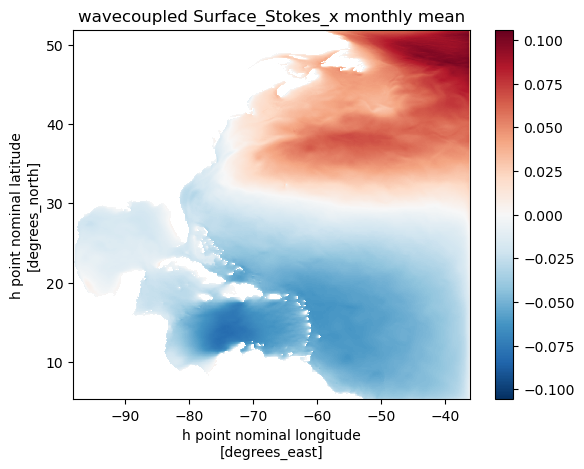

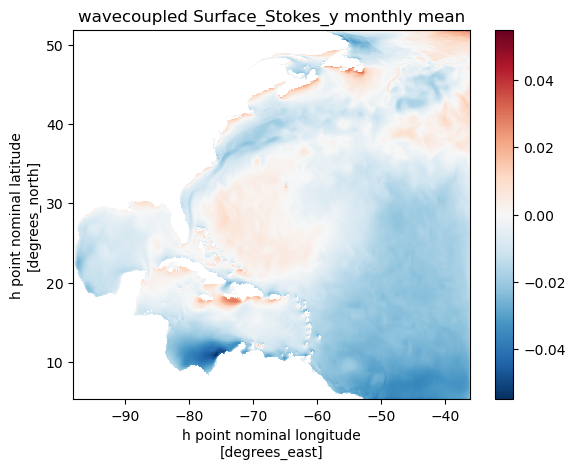

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray
import numpy as np
import logging

    # Ideally would use SSH, but some diag_tables only saved zos----for coupled waves
pp_root_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALT_wave/"
ocean_daily_wave= xarray.open_dataset(pp_root_wave+"19930101.ocean_daily.nc")
ssx_wave=ocean_daily_wave.variables['surface_stokes_x']
ssy_wave=ocean_daily_wave.variables['surface_stokes_y']
t_wave=ocean_daily_wave.variables['time']
model_grid_x = ocean_daily_wave.variables['xh']
model_grid_y = ocean_daily_wave.variables['yh']
ssx_wave_ave = ssx_wave.mean('time')[:,1:]
ssy_wave_ave = ssy_wave.mean('time')[1:,:]

dassh_ave=xarray.DataArray(ssx_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
dassh_ave.plot()
plt.title('wavecoupled Surface_Stokes_x monthly mean')
plt.show()

dassh_ave=xarray.DataArray(ssy_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
dassh_ave.plot()
plt.title('wavecoupled Surface_Stokes_y monthly mean')
plt.show()





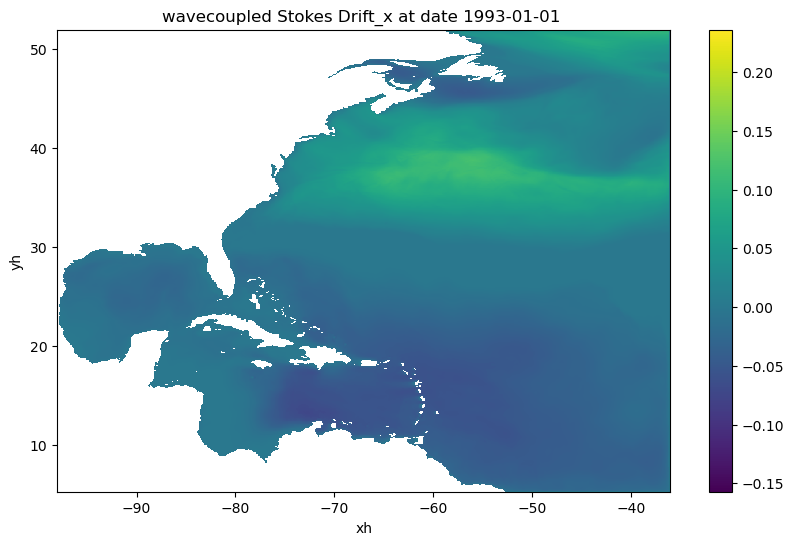

In [7]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation
import pandas as pd

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')
min=ssx_wave.min()
max=ssx_wave.max()

cax = ax.imshow(ssx_wave[1,:,1:], cmap='viridis',vmin=min,vmax=max)
cbar = fig.colorbar(cax)

def animate(i):
    ax.clear() 
    ssx_wave_ani=ssx_wave[i,:,1:]
    plths = ax.pcolormesh(model_grid_x,model_grid_y,ssx_wave_ani, vmin=min, vmax=max) 
    plt.xlabel('xh'); plt.ylabel('yh');
    t=str(t_wave[i])
    index = t.split("'")[1]
    index=index.split("T")[0]
  

    plt.title(f"wavecoupled Stokes Drift_x at date {index} ")
    return plths,
    


ani = FuncAnimation(fig, animate, frames=len(t_wave), blit=False)

writergif = animation.PillowWriter(fps=30)
ani.save('wave_ssx_ani.gif', writer=writergif)
HTML(ani.to_jshtml())





In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation
import pandas as pd

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')
min=ssy_wave.min()
max=ssy_wave.max()

cax = ax.imshow(ssy_wave[1,1:,:], cmap='viridis',vmin=min,vmax=max)
cbar = fig.colorbar(cax)

def animate(i):
    ax.clear() 
    ssy_wave_ani=ssy_wave[i,1:,:]
    plths = ax.pcolormesh(model_grid_x,model_grid_y,ssy_wave_ani, vmin=min, vmax=max) 
    plt.xlabel('xh'); plt.ylabel('yh');
    t=str(t_wave[i])
    index = t.split("'")[1]
    index=index.split("T")[0]
  

    plt.title(f"wavecoupled Stokes Drift_y at date {index} ")
    return plths,
    


ani = FuncAnimation(fig, animate, frames=len(t_wave), blit=False)

writergif = animation.PillowWriter(fps=30)
ani.save('wave_ssy_ani.gif', writer=writergif)
HTML(ani.to_jshtml())
